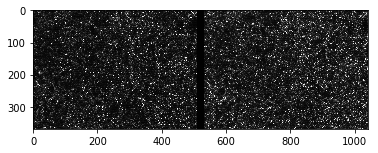

In [1]:
# %load tutorial-part1.py
#!/usr/bin/env python
import sys

from openpiv import tools, validation, process, filters, scaling, pyprocess
import numpy as np
%matplotlib inline
frame_a  = tools.imread( 'exp1_001_a.bmp' )
frame_b  = tools.imread( 'exp1_001_b.bmp' )
import pylab
pylab.imshow(np.c_[frame_a,np.ones((frame_a.shape[0],20)),frame_b],cmap=pylab.cm.gray)


C:\Anaconda\lib\site-packages\openpiv\tools.py:80: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  pl.hold(True)
C:\Anaconda\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Anaconda\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


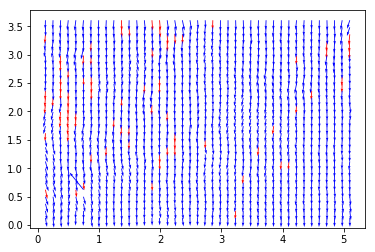

In [2]:
u, v, sig2noise = process.extended_search_area_piv( frame_a.astype(np.int32), 
                                                    frame_b.astype(np.int32),
                                                    window_size=24, overlap=12, 
                                                    dt=0.02, search_area_size=64,
                                                    sig2noise_method='peak2peak' )

x, y = process.get_coordinates( image_size=frame_a.shape, window_size=24, overlap=12 )

u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )

u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)

x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )

tools.save(x, y, u, v, mask, 'exp1_001.txt' )

tools.display_vector_field('exp1_001.txt', scale=100, width=0.0025)



C:\Anaconda\lib\site-packages\openpiv\tools.py:80: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  pl.hold(True)
C:\Anaconda\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Anaconda\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


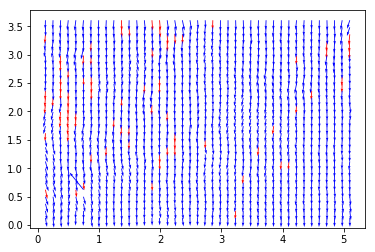

In [3]:
u1, v1, sig2noise = process.extended_search_area_piv( frame_a.astype(np.int32), 
                                                    frame_b.astype(np.int32),
                                                    window_size=24, overlap=12, 
                                                    dt=0.02, search_area_size=64,
                                                    sig2noise_method='peak2peak' )

x, y = process.get_coordinates( image_size=frame_a.shape, window_size=24, overlap=12 )

u1, v1, mask = validation.sig2noise_val( u1, v1, sig2noise, threshold = 1.3 )

u1, v1 = filters.replace_outliers( u1, v1, method='localmean', max_iter=10, kernel_size=2)

x, y, u1, v1 = scaling.uniform(x, y, u1, v1, scaling_factor = 96.52 )

tools.save(x, y, u1, v1, mask, 'exp1_001_1.txt' )

tools.display_vector_field('exp1_001_1.txt', scale=100, width=0.0025)